## 이번 모듈에서 다루는 내용
- 회귀에서의 kNN


### k-NN을 분류가 아닌 회귀분석에 사용하는 예
- 분류알고리즘을 회귀분석에도 사용할 수 있다
- 가까운 점들로부터 예측한 값의 평균을 구하는 방식
- 단순 평균을 구하기도 하고(uniform), 거리에 비례한 가중치 평균을 구하기도 한다(distance)

In [1]:
%matplotlib inline
from preamble import * #preamble모듈 에러가 나면 쥬피터파일과 같이 드린 preamble.py가 같은 폴더에 있는지 꼭 확인하세요!
from mglearn import *

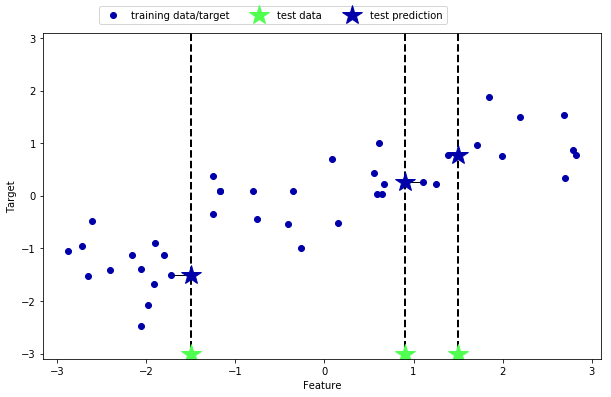

In [2]:
# 개념도
mglearn.plots.plot_knn_regression(n_neighbors=1)

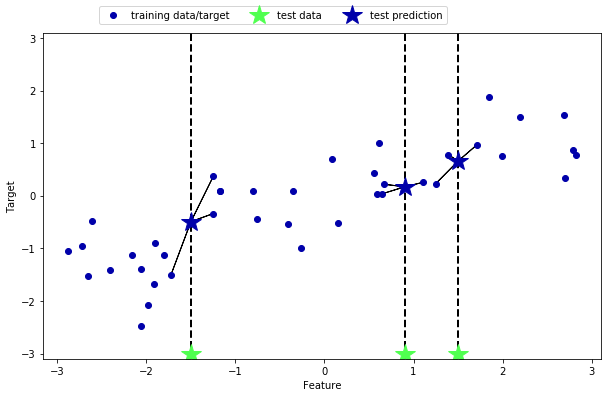

In [10]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
#여러개의 최근접 이웃을 사용할땐 이웃간의 평균이 예측됨

- Classifier가 아니라 Regressor 함수를 제공한다
- 사용법은 거의같으면 분류가 목적이 아니라 회귀값을 찾는 것이 목적이다

In [4]:
from sklearn.neighbors import KNeighborsRegressor #스펠링을 기억하자!

X, y = mglearn.datasets.make_wave(n_samples=40)
X,y

(array([[-0.753],
        [ 2.704],
        [ 1.392],
        [ 0.592],
        [-2.064],
        [-2.064],
        [-2.651],
        [ 2.197],
        [ 0.607],
        [ 1.248],
        [-2.876],
        [ 2.819],
        [ 1.995],
        [-1.726],
        [-1.909],
        [-1.9  ],
        [-1.175],
        [ 0.149],
        [-0.408],
        [-1.253],
        [ 0.671],
        [-2.163],
        [-1.247],
        [-0.802],
        [-0.264],
        [ 1.711],
        [-1.802],
        [ 0.085],
        [ 0.554],
        [-2.721],
        [ 0.645],
        [-1.977],
        [-2.61 ],
        [ 2.693],
        [ 2.794],
        [ 1.85 ],
        [-1.172],
        [-2.414],
        [ 1.105],
        [-0.359]]),
 array([-0.448,  0.331,  0.779,  0.035, -1.388, -2.472, -1.527,  1.494,
         1.   ,  0.23 , -1.06 ,  0.779,  0.754, -1.514, -1.673, -0.905,
         0.084, -0.527, -0.541, -0.341,  0.218, -1.125,  0.373,  0.098,
        -0.986,  0.967, -1.135,  0.698,  0.437, -0.957,  0.035

In [5]:
from sklearn.model_selection import train_test_split
# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=4)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')

In [6]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,20)
for n_neighbors in neighbors_settings:
    # 모델 생성
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    
    reg.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(reg.score(X_train, y_train))
    # 일반화 정확도 저장

    test_accuracy.append(reg.score(X_test, y_test))
    print(n_neighbors, reg.score(X_train, y_train))
    print(n_neighbors, reg.score(X_test, y_test))

1 1.0
1 0.3519867415115093
2 0.8489295178013407
2 0.6557491875542131
3 0.8194343929538755
3 0.8344172446249604
4 0.8168007715187524
4 0.7704189018456431
5 0.7933627228318063
5 0.7071381144011731
6 0.7871902291986861
6 0.6963552119009186
7 0.787192898001129
7 0.6752134587675717
8 0.7541918525127793
8 0.6788241385739405
9 0.7283986168755594
9 0.6541236379533191
10 0.7210974727340191
10 0.6381920637966467
11 0.6972434174127736
11 0.6989374099426371
12 0.6682666461724392
12 0.6853827358907443
13 0.6313956123358728
13 0.6911059364120702
14 0.615935837494648
14 0.6838927115096367
15 0.5890286148302105
15 0.7056253886346188
16 0.5906944580263527
16 0.7055036077606035
17 0.5539135255958023
17 0.6820756456432953
18 0.5371162326771741
18 0.6602566052151161
19 0.5255353931675315
19 0.6549724049644474


In [7]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.769  0.356  0.433 -0.769 -0.769 -0.769  0.356  0.433 -0.45  -0.769]


In [8]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))
#회귀일때 R2값을 반환

테스트 세트 R^2: 0.65


### score() 값
- 일반 분류에서는 score가 정확도를 계산했으나, 회귀분석에서는 R^^2 값을 리턴한다 (결정계수)
- 0 < R^^2 < 1 사이의 값을 갖는다
- 1은 예측이 완벽하게 맞춘 경우이고, 0은 훈련세트의 출력값인 y_train의 평균으로 예측하는, 가장 단순한 평균치를 예상하는 모델의 결과이다

#### KNeighborsRegressor 분석
- k 값의 변화에 따른 성능 비교

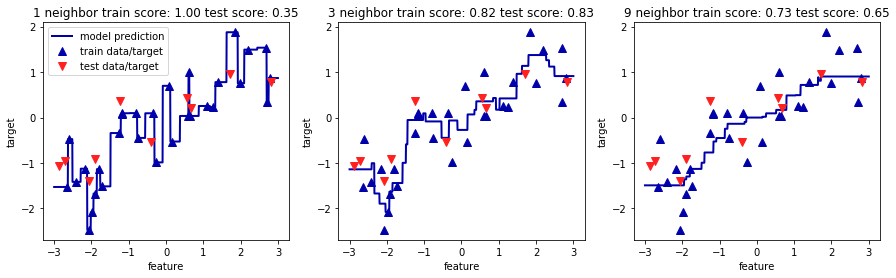

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
axes[0].legend(["model prediction", "train data/target", "test data/target"], loc="best")

- 이웃을 하나만 사용할때는 훈련세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련데이터 포인트를 모두 지나감-매우 불안정한 예측
- 이웃을 많이 사용하면 훈련데이터에는 잘 안 맞을수 있지만 더 안정적인 예측

- kNN 방식이 이해하기도 쉽고 구현도 쉽지만, 데이터 사이즈가 커지면 동작이 매우 느려지는 단점이 있다. 특성(피처)가 수백개 이상으로 많은 경우나 sparse한 경우에도 잘 동작하지 않는다.
- 데이터의 전처리가 반드시 필요하다

- 실제로 회귀분석에서 kNN은 잘 사용하지 않는다
- 회귀에서 선형 회귀가 주로 사용되는데, 1차원에서는 장점이 잘 나타나지 않지만, 특성이 많은 경우일수록 선형 예측이 잘 동작한다

7 3, 5 85
- 정확도 92% 
- recall(재현율) 7/12 = 7 / (7+5)
- precision (정밀도) 7/10 7 / (7+3)